In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the dataset
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Week 3/movie_review.csv')
df = reviews.copy()

In [5]:
df.head()

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1


In [58]:
df.shape

(9982, 5)

In [6]:
df['review'].iloc[0]

"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done."

Data cleaning

In [7]:
# check for missing values
df.isnull().sum()

,0
review,0
sentiment,0


In [8]:
# # drop null values
# df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)

In [9]:
# check for duplicates
df.duplicated().sum()

18

In [10]:
# drop the duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.duplicated().sum()

0

EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

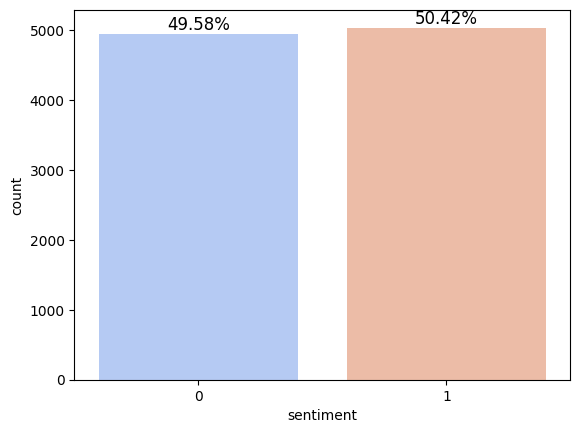

In [13]:
ax = sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', legend=False)
total = len(df)
for p in ax.patches:
  percentage = f"{100*p.get_height()/total:.2f}%"
  ax.annotate(percentage,
             (p.get_x()+p.get_width()/2, p.get_height()),
              ha='center',va='bottom', fontsize=12, color='black')

* Target class looks balanced - equal proportion of positive and negative reviews
* negative - 0, positive - 1

Model building transformers - (text preprocessing + text vectorization)

In [14]:
# installing libraries for transformers
# !pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

In [15]:
from sentence_transformers import SentenceTransformer

In [16]:
# define the model
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
# model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
# there are many other models to choose from too!
# https://www.sbert.net/docs/pretrained_models.html
# https://huggingface.co/spaces/mteb/leaderboard
# model = SentenceTransformer('BAAI/bge-base-en-v1.5')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
# sample text embeddings (sentence embeddings not token embeddings)
txt = "The cat sat on the mat."
model.encode(txt)

array([-7.62547890e-04, -3.64218503e-02, -8.75257794e-03, -1.53388204e-02,
        1.65247936e-02, -4.18736897e-02, -1.76651776e-02, -1.49496421e-02,
        5.98672815e-02,  6.93243183e-03,  5.68550341e-02,  3.19586620e-02,
       -1.69514101e-02, -8.66274443e-03,  4.52629663e-02,  8.34512562e-02,
       -6.09474024e-03,  4.05557603e-02,  3.16474363e-02, -9.67372302e-03,
        2.36854106e-02,  1.59546488e-03, -1.75382500e-03,  2.84428056e-02,
       -6.54051527e-02,  4.04944131e-03, -4.61958386e-02, -1.69816259e-02,
       -3.79323661e-02, -2.67120190e-02,  4.13436070e-02,  2.56604571e-02,
        1.23565774e-02, -9.78273824e-02,  1.82971769e-06, -8.55388679e-03,
       -2.17686743e-02, -6.62180735e-03,  1.04263142e-01, -6.57711700e-02,
       -2.87765414e-02, -4.05344591e-02, -4.50309599e-03, -2.40393332e-03,
        4.98218462e-02, -1.39766335e-02,  3.37122567e-02, -5.97341508e-02,
       -5.93603104e-02,  3.33430432e-02, -1.48700960e-02, -3.55081931e-02,
       -1.24972193e-02, -

In [18]:
# cosine similarity of two sentences
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# finds the sentence similarity of two sentences
def sentence_similarity(txt):
  embedding1 = model.encode(txt[0])
  embedding2 = model.encode(txt[1])
  return cosine_similarity([embedding1], [embedding2])


sentence1 = "I love cats."
sentence2 = "I adore felines."
x = sentence_similarity([sentence1, sentence2])
print(*x)

[0.8738754]


In [20]:
# # alternative way of doing
# def sentence_similarity(txt):
#   embedding1 = model.encode(txt[0])
#   embedding2 = model.encode(txt[1])
#   numerator = np.dot(embedding1, embedding2)
#   denominator = np.linalg.norm(embedding1)*np.linalg.norm(embedding2)
#   cosine_similarity = numerator/denominator
#   return cosine_similarity

# sentence1 = "The cat sat on the mat."
# sentence2 = "The dog sat on the sofa."
# x = sentence_similarity([sentence1, sentence2])
# print(x)

Text vectorization using a sentence transformer

In [21]:
import torch

In [22]:
# sets the device to GPU else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )

In [23]:
embedding_matrix = model.encode(df['review'], device=device, show_progress_bar=True)

Batches:   0%|          | 0/312 [00:00<?, ?it/s]

In [24]:
embedding_matrix.shape

(9982, 768)

In [25]:
def top_k_reviews(embedding_matrix, query_text, k):
  query_encoded = model.encode(query_text)
  similarity_scores = cosine_similarity(embedding_matrix, [query_encoded]).flatten()
  top_k_indices = np.argsort(similarity_scores)[::-1][:k]
  return df.loc[top_k_indices, "review"]

query_text = "Action movies"
top_reviews = top_k_reviews(embedding_matrix, query_text, 5)
print(top_reviews)

5896    Non-stop action and just about every conceivab...
429     Wow, here it finally is; the action "movie" wi...
9709    A combat veteran, fresh from completion of nin...
5000    I like to think I have seen it all. SS DOOMTRO...
8551    Maximum risk is quite surprising to a person t...
Name: review, dtype: object


In [26]:
top_reviews.iloc[0]

'Non-stop action and just about every conceivable (and inconceivable!) sci-fi/horror cliche can be found in this blatantly silly but fun, big-budget epic. The pace never lets up, especially in the shorter US version, which tightens things up considerably.'

Sentiment analysis using Random Forest

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [28]:
X = embedding_matrix
y = df['sentiment']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [31]:
model_rf = RandomForestClassifier(random_state=1)

In [32]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [33]:
print(f"Train accuracy:", model_rf.score(X_train, y_train))
print(f"Test accuracy:", model_rf.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8327212020033389


In [34]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rs = RandomizedSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=3, n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=1)

In [35]:
best_params = rs.best_params_

In [36]:
model_rf_tuned = RandomForestClassifier(**best_params, random_state=1)
model_rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=1)

In [37]:
print(f"Train accuracy:", model_rf_tuned.score(X_train, y_train))
print(f"Test accuracy:", model_rf_tuned.score(X_test, y_test))

Train accuracy: 0.9989981394017461
Test accuracy: 0.8357262103505843


In [38]:
def get_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=[1,0])
  df_cm = pd.DataFrame(cm, index=['Acutal 1', 'Actual 0'], columns=['Predicted 1', 'Predicted 0'])
  return sns.heatmap(df_cm, annot=True, fmt='g');

<Axes: >

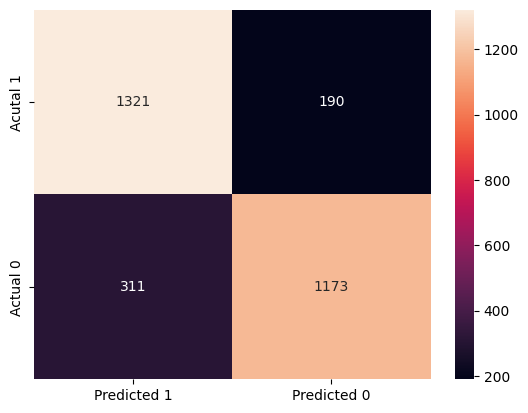

In [39]:
y_pred_base = model_rf.predict(X_test)
get_confusion_matrix(y_test, y_pred_base)

<Axes: >

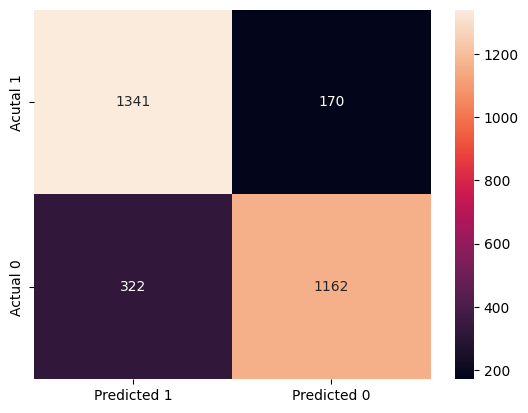

In [40]:
y_pred_tuned = model_rf_tuned.predict(X_test)
get_confusion_matrix(y_test, y_pred_tuned)

Sentiment analysis using a transfomrer

In [41]:
from transformers import pipeline

In [42]:
# use a default pre-trained sentiment model
sentiment_model = pipeline("sentiment-analysis")
# use a specified sentiment model from huggin face library
# sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
# many more models can be found at https://huggingface.co/models?pipeline_tag=text-classification&sort=trending&search=sentiment

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [43]:
query_texts = ["The movie was amazing", "It could have been bit better", "Not failing to make us laugh"]
sentiment_model(query_texts)

[{'label': 'POSITIVE', 'score': 0.9998806715011597},
 {'label': 'NEGATIVE', 'score': 0.9991939663887024},
 {'label': 'POSITIVE', 'score': 0.9995597004890442}]

In [44]:
result = sentiment_model(df['review'].to_list(), truncation=True)
result

[{'label': 'POSITIVE', 'score': 0.9991868138313293},
 {'label': 'NEGATIVE', 'score': 0.998444139957428},
 {'label': 'POSITIVE', 'score': 0.9851277470588684},
 {'label': 'NEGATIVE', 'score': 0.9995088577270508},
 {'label': 'POSITIVE', 'score': 0.9992958307266235},
 {'label': 'POSITIVE', 'score': 0.9998276233673096},
 {'label': 'NEGATIVE', 'score': 0.9903488159179688},
 {'label': 'NEGATIVE', 'score': 0.9993889331817627},
 {'label': 'NEGATIVE', 'score': 0.9000667929649353},
 {'label': 'NEGATIVE', 'score': 0.6614041924476624},
 {'label': 'POSITIVE', 'score': 0.9996953010559082},
 {'label': 'NEGATIVE', 'score': 0.9989445805549622},
 {'label': 'NEGATIVE', 'score': 0.9991685152053833},
 {'label': 'POSITIVE', 'score': 0.9478513598442078},
 {'label': 'NEGATIVE', 'score': 0.9995229244232178},
 {'label': 'NEGATIVE', 'score': 0.9996261596679688},
 {'label': 'NEGATIVE', 'score': 0.9992040991783142},
 {'label': 'POSITIVE', 'score': 0.9935503005981445},
 {'label': 'NEGATIVE', 'score': 0.9995146989822

In [45]:
df['label_predicted'] = [sentiment['label'] for sentiment in result]
df['score_predicted'] = [sentiment['score']for sentiment in result]

In [46]:
df['label_predicted'].head()

,label_predicted
0,POSITIVE
1,NEGATIVE
2,POSITIVE
3,NEGATIVE
4,POSITIVE


In [47]:
df['score_predicted'].head()

,score_predicted
0,0.999187
1,0.998444
2,0.985128
3,0.999509
4,0.999296


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label_predicted'])
y_pred_transformer = df['label_encoded'].values
y_pred_transformer

array([1, 0, 1, ..., 0, 0, 0])

<Axes: >

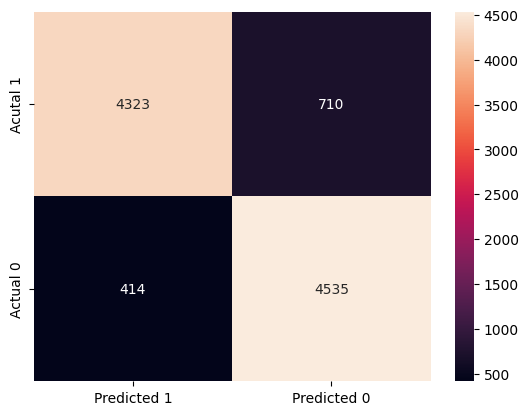

In [50]:
y_test_original = df['sentiment'].values
get_confusion_matrix(y_test_original, y_pred_transformer)

Model building google FLAN-T5

In [51]:
# importing the FLAN T5 library
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [52]:
# tokenize the sentences into words -> return input ids and attention mask
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [53]:
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto")

In [54]:
def generate_sentiment_sample(prompt):
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
  outputs = model.generate(input_ids, max_length=10, do_sample=False)
  return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [55]:
prompt = '''Categorize the sentiment for the review as positive or negative.
           Return 1 for positive and 0 for negative'''
generate_sentiment_sample(prompt)

'1'

In [110]:
def generate_sentiment(review):
  prompt = f'what is the sentiment of the review: {review}?. Return 1 for positive and 0 for negative.'
  input_ids = tokenizer(prompt, return_tensors="pt",truncation=True, max_length=512).input_ids.to(model.device)
  outputs = model.generate(input_ids, max_length=10, do_sample=True, temperature=0.001)
  sentiment = tokenizer.decode(outputs[0], skip_special_tokens=True)
  if sentiment in ["1", "positive"]:
    return 1
  elif sentiment in ["0", "negative"]:
    return 0
  else:
    return None

In [111]:
df_reduced = df.iloc[:1000,:]

In [112]:
df_reduced.head()

,review,sentiment,label_predicted,score_predicted,label_encoded
0,"Okay, I know this does'nt project India in a g...",1,POSITIVE,0.999187,1
1,Despite John Travolta's statements in intervie...,0,NEGATIVE,0.998444,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1,POSITIVE,0.985128,1
3,He seems to be a control freak. I have heard h...,0,NEGATIVE,0.999509,0
4,"Admittedly, there are some scenes in this movi...",1,POSITIVE,0.999296,1


In [113]:
df_reduced['label'] = df_reduced['review'].apply(generate_sentiment)
df_reduced['label']

,label
0,1
1,0
2,1
3,0
4,1
...,...
995,1
996,1
997,0
998,1


<Axes: >

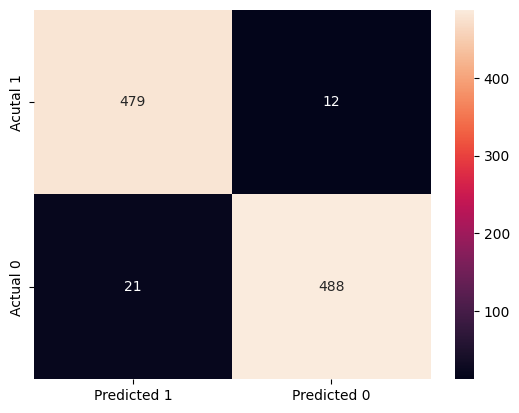

In [114]:
get_confusion_matrix(df_reduced['sentiment'], df_reduced['label'])